In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tdata= pd.read_csv('StudentsPerformance.csv')
tdata

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test

In [12]:
tdata['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [15]:
import warnings
warnings.filterwarnings('ignore')

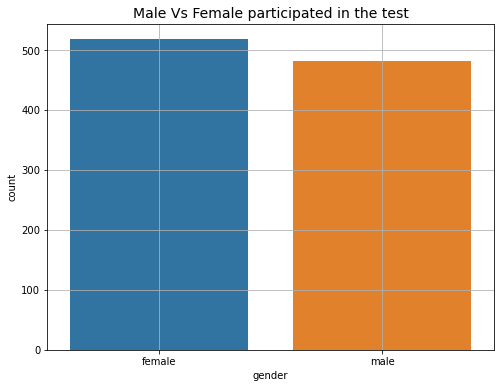

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(tdata['gender'])
plt.title('Male Vs Female participated in the test',fontsize=14)
plt.grid()
plt.show()


# 2. What do you think about the student's parental level of education?

In [18]:
tdata['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [19]:
pa=pd.DataFrame(tdata['parental level of education'].value_counts())
pa

                


,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


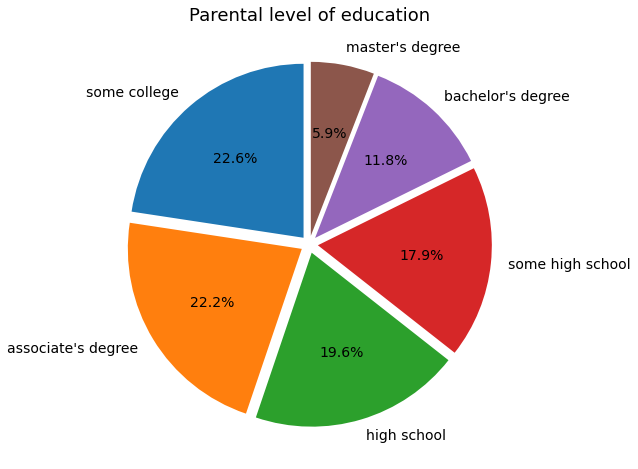

In [16]:
plt.figure(figsize=(10,8))
plt.pie(x='parental level of education',data=pa,labels=pa.index,startangle=90,autopct='%1.1f%%',
        explode=(0.05,0.05,0.05,0.05,0.05,0.05),textprops={'fontsize': 14})
plt.title('Parental level of education',fontsize=18)
plt.show()

# 3. Who scores the most on average for math, reading and writing 

# a.Based on gender

In [20]:
tdata.groupby('gender')['math score','reading score','writing score'].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


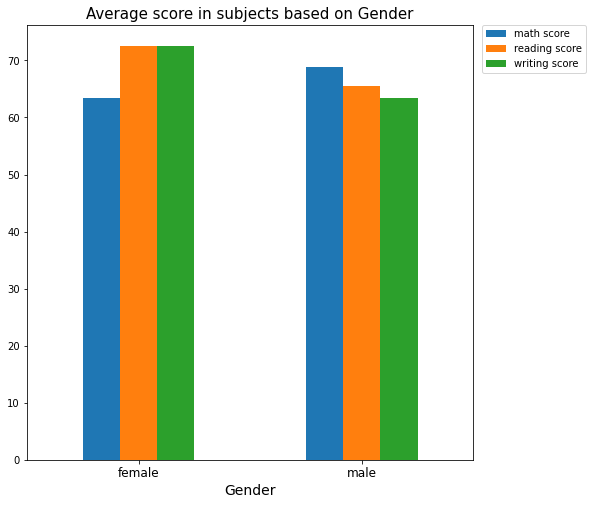

In [18]:
df.groupby('gender')['math score','reading score','writing score'].mean().plot.bar(figsize=(8,8))
plt.title('Average score in subjects based on Gender',fontsize=15)
plt.legend(loc=(1.02,.89))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Gender',fontsize=14)
plt.show()

# b.Based on Test Preparation Course

In [21]:
tdata.groupby('test preparation course')['math score','reading score','writing score'].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


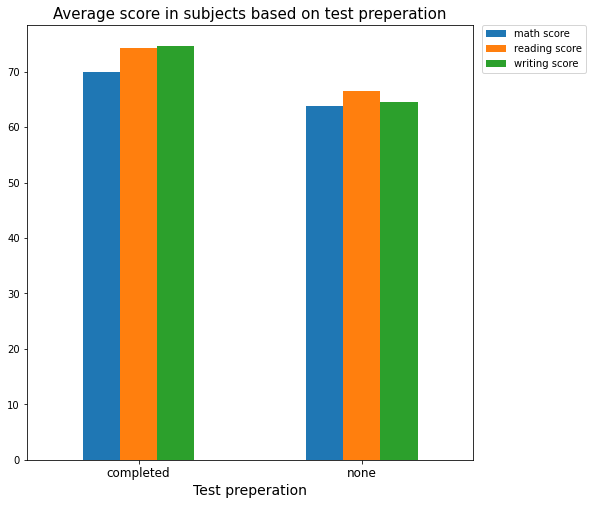

In [22]:
tdata.groupby('test preparation course')['math score','reading score','writing score'].mean().plot.bar(figsize=(8,8))
plt.title('Average score in subjects based on test preperation',fontsize=15)
plt.legend(loc=(1.02,.89))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Test preperation',fontsize=14)
plt.show()

# 4. What do you think about the scoring variation for math, reading and writing

# a.based on Gender
 

In [23]:
tdata.groupby('gender')[ 'math score','reading score','writing score'].var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


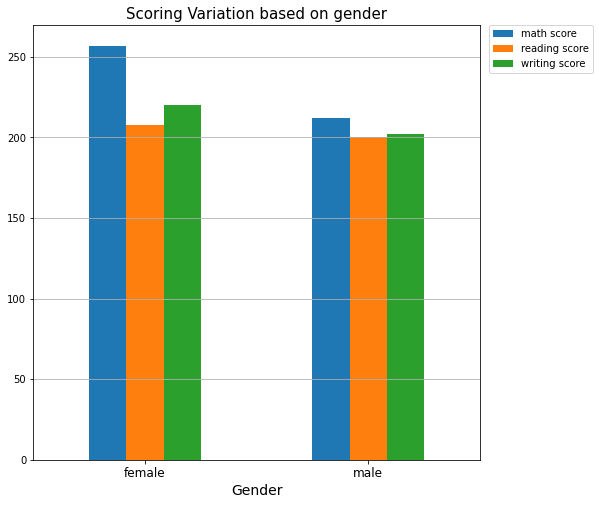

In [24]:
tdata.groupby('gender')[ 'math score','reading score','writing score'].var().plot.bar(figsize=(8,8))
plt.title('Scoring Variation based on gender',fontsize=15)
plt.legend(loc=(1.02,.89))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Gender',fontsize=14)
plt.grid(axis='y')
plt.show()

# b. based on Test preparation course

In [25]:
tdata.groupby('test preparation course')[ 'math score','reading score','writing score'].var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


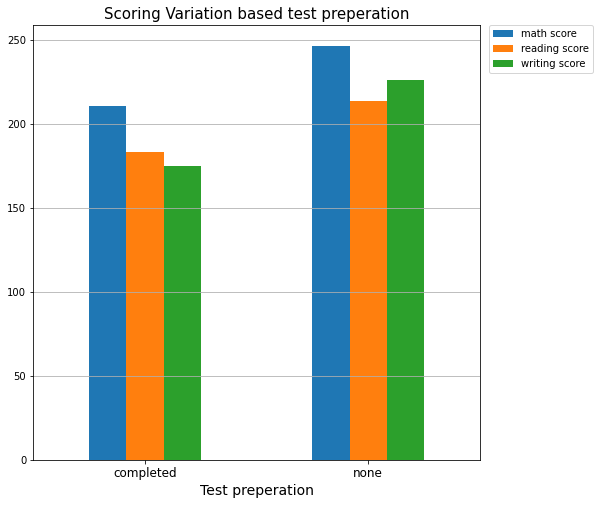

In [26]:
tdata.groupby('test preparation course')['math score','reading score','writing score'].var().plot.bar(figsize=(8,8))
plt.title('Scoring Variation based test preperation',fontsize=15)
plt.legend(loc=(1.02,.89))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Test preperation',fontsize=14)
plt.grid(axis='y')
plt.show()

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [27]:
# Sorting math scores in ascending order
data6= tdata.sort_values(['math score'], ascending = True)


# Dividing the data set into 3 quartiles and taking the 3rd quartile of the datset to find top 25% students.
# The three dividing points (or quantiles)(0.25, 0.50 and 0.75) that split data into four equally sized groups are called quartiles.
df = pd.DataFrame(data6)
Quan = df['math score'].quantile(q=0.75)
print('The third quartile is at :', Quan)


# Tabulating math score which is above Q3( 3rd Quartile = 77 )
data7= data6[data6['math score']>=Quan]
data7

The third quartile is at : 77.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
426,female,group D,some college,standard,none,77,68,77
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
851,male,group D,some college,standard,completed,77,62,62
...,...,...,...,...,...,...,...,...
516,female,group E,bachelor's degree,standard,none,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
